# Data Dictionary
<b>CustomerID</b> - Bank ID of the Customer  
<b>Surname</b> - Customer’s Surname  
<b>CreditScore</b> - Current Credit score of the customer  
<b>Geography</b> - Current country of the customer  
<b>Gender</b> - Customer’s Gender  
<b>Age</b> - Customer’s Age  
<b>Tenure</b> - Customer’s duration association with bank in years  
<b>Balance</b> - Current balance in the bank account.  
<b>Num of Dependents</b> - Number of dependents  
<b>Has Crcard</b> - 1 denotes customer has a credit card and 0 denotes customer does not have a credit card  
<b>Is Active Member</b> - 1 denotes customer is an active member and 0 denotes customer is not an active member  
<b>Estimated Salary</b> - Customer’s approx. salary  
<b>Exited</b> - 1 denotes customer has exited the bank and 0 denotes otherwise  

### Load library and import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
cancer=pd.read_csv("ANN_Quiz_Data_Breast_Cancer.csv")

### Inspect the data

In [3]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Summary

In [5]:
cancer.describe(include="all")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
cancer.shape

(569, 31)

### Proportion of observations in Target classes

In [7]:
# Get the proportions
cancer['Target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: Target, dtype: float64

### Checking for Missing values

In [8]:
# Are there any missing values ?
cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

There are no missing values

### Checking for Duplicates

In [9]:
# Are there any duplicates ?
dups = cancer.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
cancer[dups]

Number of duplicate rows = 0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target


There are no Duplicates

### Checking for Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 31 Text major ticklabel objects>)

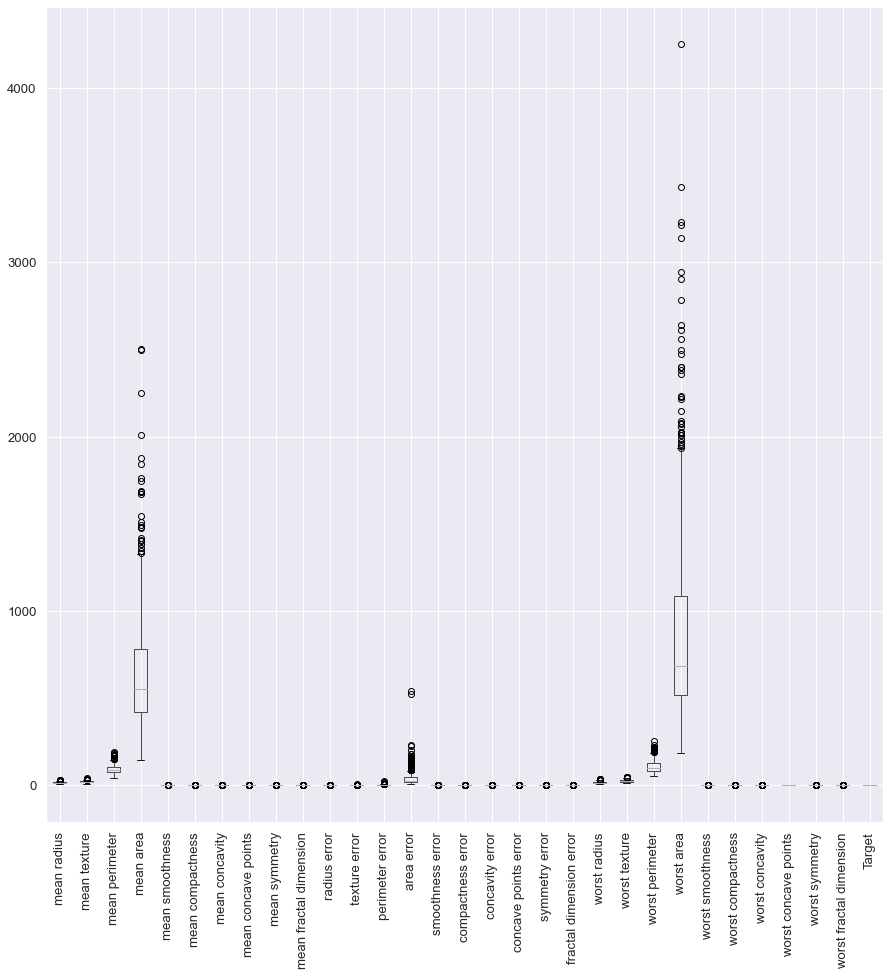

In [50]:
plt.figure(figsize=(15,15))
cancer.boxplot(vert=1)
plt.xticks(rotation=90)

Very small number of  outliers are present, which is also not significant as it will not affect much on ANN Predictions

### Checking pairwise distribution of the continuous variables

In [11]:
import seaborn as sns
#sns.pairplot(cancer)

### Checking for Correlations

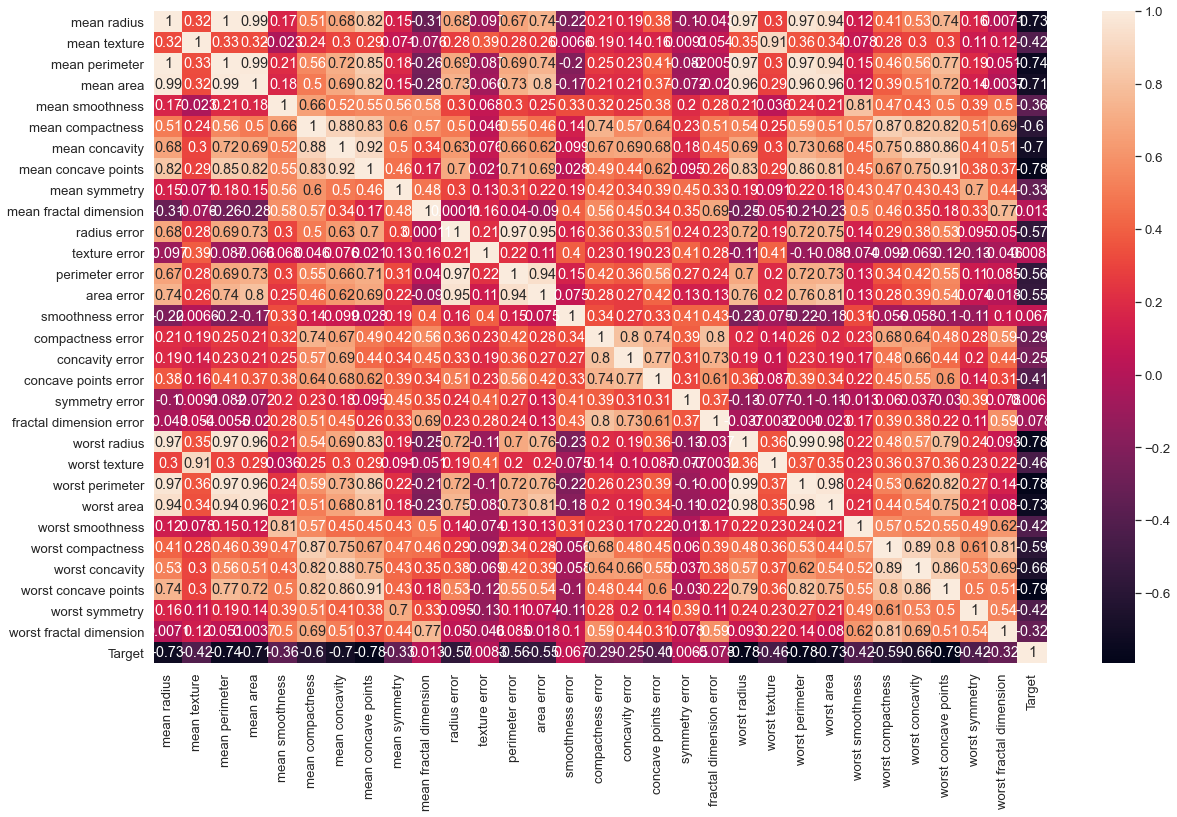

In [12]:
# construct heatmap with only continuous variables
plt.figure(figsize=(20,12))
sns.set(font_scale=1.2)
sns.heatmap(cancer.corr(), annot=True)

There is hardly any correlation between the variables

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Extract x and y
y = cancer['Target']
x = cancer.drop(['Target'], axis=1)

In [15]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=0)

In [16]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (455, 30)
x_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


### Scaling the variables

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [19]:
#Scale the training data
x_train = sc.fit_transform(x_train)

In [20]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [21]:
# Apply the transformation on the test data
x_test = sc.transform(x_test)

In [22]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

### Building Neural Network Model

In [23]:
clf = MLPClassifier(hidden_layer_sizes=500, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=0,tol=0.01)

In [24]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.79760861
Iteration 2, loss = 0.77228944
Iteration 3, loss = 0.73409134
Iteration 4, loss = 0.68885122
Iteration 5, loss = 0.64153498
Iteration 6, loss = 0.59673128
Iteration 7, loss = 0.55396846
Iteration 8, loss = 0.51537772
Iteration 9, loss = 0.48080254
Iteration 10, loss = 0.45048966
Iteration 11, loss = 0.42372510
Iteration 12, loss = 0.40021380
Iteration 13, loss = 0.37989038
Iteration 14, loss = 0.36180658
Iteration 15, loss = 0.34596672
Iteration 16, loss = 0.33184261
Iteration 17, loss = 0.31927648
Iteration 18, loss = 0.30808108
Iteration 19, loss = 0.29810995
Iteration 20, loss = 0.28899081
Iteration 21, loss = 0.28067938
Iteration 22, loss = 0.27320494
Iteration 23, loss = 0.26625536
Iteration 24, loss = 0.25989608
Iteration 25, loss = 0.25400012
Iteration 26, loss = 0.24854849
Iteration 27, loss = 0.24346309
Iteration 28, loss = 0.23873586
Iteration 29, loss = 0.23423271
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. S

MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=0,
              solver='sgd', tol=0.01, verbose=True)

### Predicting training data

In [25]:
# use the model to predict the training data
y_pred = clf.predict(x_train)

### Evaluating model performance on training data

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
confusion_matrix(y_train,y_pred)

array([[151,  14],
       [  6, 284]], dtype=int64)

In [28]:
clf.score(x_train,y_train)

0.9560439560439561

In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       165
           1       0.95      0.98      0.97       290

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



AUC: 0.991


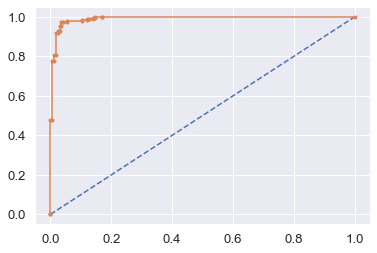

In [30]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Predicting Test Data and comparing model performance

In [31]:
y_pred = clf.predict(x_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[41,  6],
       [ 2, 65]], dtype=int64)

In [33]:
clf.score(x_test,y_test)

0.9298245614035088

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        47
           1       0.92      0.97      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



AUC: 0.984


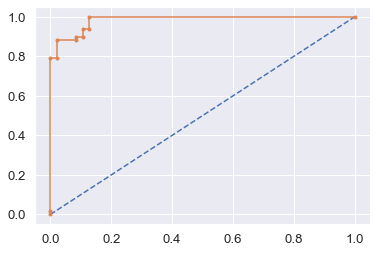

In [35]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Tuning through Grid Search

**Below Code may take too much time.These values can be used instead {'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [37]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [38]:
grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [39]:
best_grid = grid_search.best_estimator_

In [40]:
best_grid

MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=1, tol=0.01)

In [41]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [42]:
confusion_matrix(y_train,ytrain_predict)

array([[160,   5],
       [  1, 289]], dtype=int64)

In [43]:
clf.score(x_train,y_train)

0.9560439560439561

In [44]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       165
           1       0.98      1.00      0.99       290

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



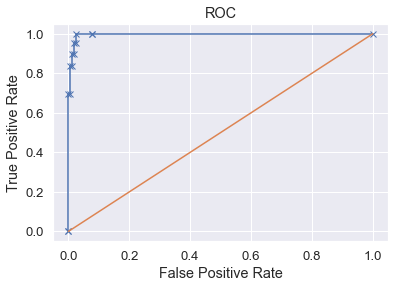

Area under Curve is 0.9960919540229886


In [45]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

In [46]:
confusion_matrix(y_test,ytest_predict)

array([[44,  3],
       [ 2, 65]], dtype=int64)

In [47]:
clf.score(x_test,y_test)

0.9298245614035088

In [48]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



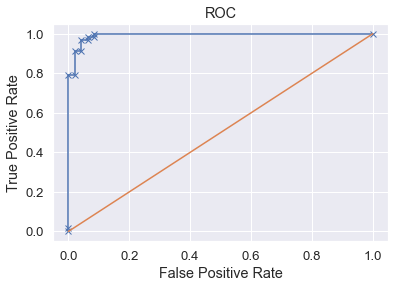

Area under Curve is 0.9926960939980947


In [49]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))